# Movies - Exploratory Data Analysis
- Andrea Cohen
- 03.02.23

## Business Problem:
- to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset
- to use this database to analyze what makes a movie successful
- to provide recommendations to the stakeholder on how to make a successful movie

## Tasks:
- Download several files from IMDB’s movie data set and filter out the subset of moves requested by the stakeholder.
- Use an API to extract box office revenue and profit data to add to the IMDB data and perform exploratory data analysis.
- Construct and export a MySQL database using the data.
- Apply hypothesis testing to explore what makes a movie successful.
- Produce a Linear Regression model to predict movie performance.

## Data:

Data Location - The dataset files can be accessed and downloaded from https://datasets.imdbws.com/. The data is refreshed daily.

Data Source - TMDB

![png](TMDB1024_1.png)

IMDb Dataset Details -

- title.akas.tsv.gz -  
Contains the following information for titles:

 - titleId (string) - a tconst, an alphanumeric unique identifier of the title
 - ordering (integer) – a number to uniquely identify rows for a given titleId
 - title (string) – the localized title
 - region (string) - the region for this version of the title
 - language (string) - the language of the title
 - types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
 - attributes (array) - Additional terms to describe this alternative title, not enumerated
 - isOriginalTitle (boolean) – 0: not original title; 1: original title  
 
 
- title.basics.tsv.gz -   
Contains the following information for titles:
 - tconst (string) - alphanumeric unique identifier of the title
 - titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
 - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
 - originalTitle (string) - original title, in the original language
 - isAdult (boolean) - 0: non-adult title; 1: adult title
 - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
 - endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
 - runtimeMinutes – primary runtime of the title, in minutes
 - genres (string array) – includes up to three genres associated with the title   
 
 
- title.ratings.tsv.gz –   
Contains the IMDb rating and votes information for titles
 - tconst (string) - alphanumeric unique identifier of the title
 - averageRating – weighted average of all the individual user ratings
 - numVotes - number of votes the title has received

## Preliminary steps

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
# load the csv.gz's of results for each year extracted
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
# concatenate the data into 1 dataframe
movies_eda = pd.concat([df_2000, df_2001], ignore_index=True)
pd.set_option('display.max_column', None)
display(movies_eda.head())
display(movies_eda.tail())

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.872,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.838,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",25.211,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2135.0,PG


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2520,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,Underground French necrophilia nastiness,0.841,/2Xh5ywVZJC5OxKYDS26fVJfC8zq.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.0,0.0,NaN
2521,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,1.341,/75kV4BpVnXe2kAMsWAKxx466M88.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
2522,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,0.600,NaN,"[{'id': 68934, 'logo_path': None, 'name': 'Ske...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-10,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
2523,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,Derek gets sucked into a gothic cult that turn...,0.600,/goddglRmgDgQuo9tlMdoeeHlRfX.jpg,"[{'id': 133614, 'logo_path': None, 'name': 'Wo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-01,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR
2524,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,A good-natured kung fu kid gets caught up in c...,1.094,/aO5ZupdPuOyIhHbhZCHzldh2Dvp.jpg,"[{'id': 13958, 'logo_path': '/yblRwoxf2sGIzzWV...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2001-07-12,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [4]:
budget_filter = movies_eda['budget'] > 0
revenue_filter = movies_eda['revenue'] > 0
movies_financial = movies_eda[budget_filter | revenue_filter]
movies_financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 1 to 2504
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                631 non-null    object 
 1   adult                  631 non-null    float64
 2   backdrop_path          534 non-null    object 
 3   belongs_to_collection  107 non-null    object 
 4   budget                 631 non-null    float64
 5   genres                 631 non-null    object 
 6   homepage               75 non-null     object 
 7   id                     631 non-null    float64
 8   original_language      631 non-null    object 
 9   original_title         631 non-null    object 
 10  overview               628 non-null    object 
 11  popularity             631 non-null    float64
 12  poster_path            612 non-null    object 
 13  production_companies   631 non-null    object 
 14  production_countries   631 non-null    object 
 15  relea

- 631 movies had at least some valid financial information.

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [5]:
movies_financial['certification'].value_counts()

R        230
PG-13    131
PG        36
NR        17
G         14
Name: certification, dtype: int64

- There are 14 rated G movies.
- There are 36 rated PG movies.
- There are 131 rated PG-13 movies.
- There are 230 rated R movies.
- There are 17 rated NR movies (not rated).

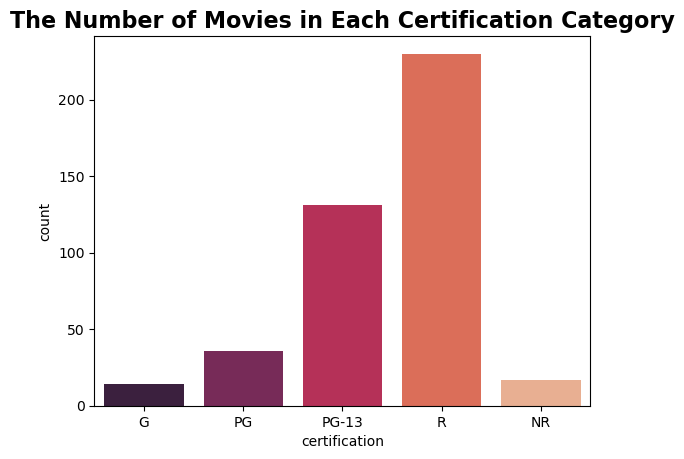

In [6]:
sns.countplot(data = movies_financial, x = 'certification', order = ['G', 'PG', 'PG-13', 'R', 'NR'], palette = 'rocket')
plt.title('The Number of Movies in Each Certification Category', fontsize = 16, fontweight = 'bold');

## What is the average revenue per certification category?

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
movies_mean_revenue_per_certification = movies_financial.groupby('certification')['revenue'].mean()
movies_mean_revenue_per_certification

certification
G       123746274.93
NR        9588674.35
PG      109533845.75
PG-13    99262990.70
R        33066920.28
Name: revenue, dtype: float64

- The average revenue for rated G movies was 123746274.93.
- The average revenue for rated PG movies was 109533845.75.
- The average revenue for rated PG-13 movies was 99262990.70.
- The average revenue for rated R movies was 33066920.28.
- The average revenue for rated NR movies (not rated) was 9588674.35. 

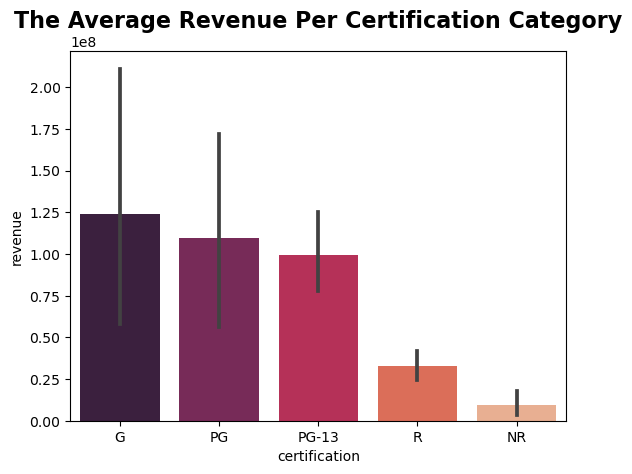

In [8]:
sns.barplot(data = movies_financial, x = 'certification', y = 'revenue', order = ['G', 'PG', 'PG-13', 'R', 'NR'], palette = 'rocket')
plt.title('The Average Revenue Per Certification Category', fontsize = 16, fontweight = 'bold');

## What is the average budget per certification category?

In [9]:
movies_mean_budget_per_certification = movies_financial.groupby('certification')['budget'].mean()
movies_mean_budget_per_certification

certification
G       40857142.86
NR       6302358.47
PG      43819367.75
PG-13   43008839.14
R       19660888.91
Name: budget, dtype: float64

- The average budget for rated G movies was 40857142.86.
- The average budget for rated PG movies was 43819367.75.
- The average budget for rated PG-13 movies was 43008839.14.
- The average budget for rated R movies was 19660888.91.
- The average budget for rated NR movies (not rated) was 6302358.47. 

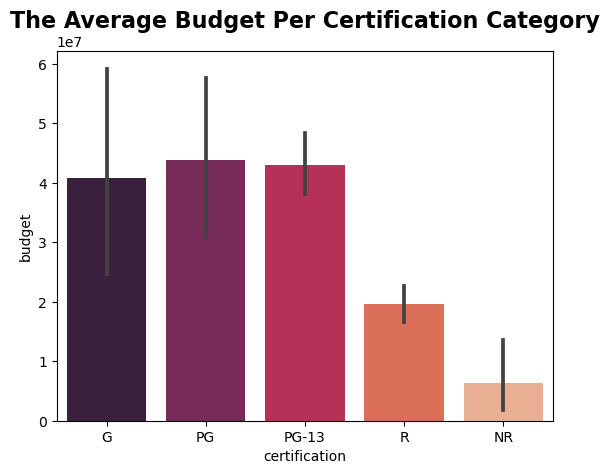

In [11]:
sns.barplot(data = movies_financial, x = 'certification', y = 'budget', order = ['G', 'PG', 'PG-13', 'R', 'NR'], palette = 'rocket')
plt.title('The Average Budget Per Certification Category', fontsize = 16, fontweight = 'bold');